## Исследование данных о российском кинопрокате
Цель исследования данного проекта - изучить рынок российского кинопроката, выявить текущие тренды и оценить интерес зрителя к фильмам, получившим государственную поддержку. Для этого необходимо анализировать данные, опубликованные на портале открытых данных Министерства культуры, включающие информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также данные с сайта КиноПоиск.
Для выполнения работы мы имеем 2 таблицы:
/datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 
/datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах.
Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.
Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.
Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях.

### Шаг 1. Загрузка файлов с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

Загружаем данные из csv-файла в датафрейм c помощью библиотеки pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

Изучаем общую информацию о полученном датафрейме,
такую как количество записей, типы данных и наличие пропущенных значений.
Строим гистограмму и наглядно видим  распределение числовых значений.Установим формат отображения чисел с двумя знаками после запятой для всех числовых значений в датафреймах.

In [3]:
display(mkrf_movies.head())
display(mkrf_movies.info())
mkrf_movies.shape
display(mkrf_shows.info())
display(mkrf_shows.head())
mkrf_shows.shape
pd.set_option('display.float_format', '{:,.2f}'.format)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


В таблице mkrf_movies столб имеет тип object,  в столбе mkrf_shows тип int64. Для объединение таблиц подойдет этот столбец. Посмотрим столбец  object в таблице  более пристально, если ли факторы которые помешают нам произвести перевод его в тип int64 и выполнить  объединение таблиц

In [4]:
display(mkrf_movies['puNumber'].head(10))
display(mkrf_movies[~mkrf_movies['puNumber'].str.isdigit()])

0    221048915
1    111013716
2    221038416
3    221026916
4    221030815
5    111013816
6    111007013
7    221074614
8    121011416
9    111019114
Name: puNumber, dtype: object

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Cтрока 804 содержит пробел который будет автоматически удален при преобразовании.

In [5]:
display(mkrf_movies[mkrf_movies['puNumber'].str.contains(' ')])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN


Для объединения двух таблиц по столбу puNumber, заменяем значение 'нет' в строке 1797 на 111009614, номер взят с сайта Министерства культуры Российской Федерации, и переводим столбец в int64.


In [6]:
mkrf_movies['puNumber']=  mkrf_movies['puNumber'].replace('нет', '111009614')
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int64')

Выполним слияние двух DataFrame (mkrf_movies и mkrf_shows) по столбцу 'puNumber'.

In [7]:
data = pd.merge(mkrf_movies, mkrf_shows, on='puNumber', how='left')
display(data.shape)

(7486, 16)

Посмотрим количество значений ключа 'puNumber' в столбце mkrf_shows, которые не содержатся в столбце mkrf_movies

In [8]:
new_values = mkrf_shows[~mkrf_shows['puNumber'].isin(mkrf_movies['puNumber'])]['puNumber'].unique()
display(len(new_values))

0

Так как новых значений ключа 'puNumber' в столбце mkrf_shows нет,проверим произошли ли потери при объеденении, методом сравнения количества строк в таблице mkrf_movies и data.

In [9]:
original_rows = len(mkrf_movies)
merged_rows = len(data)
if original_rows == merged_rows:
    print("Объединение таблиц прошло без потерь данных.")
else:
    print("При объединении таблиц возможны потери данных.")

Объединение таблиц прошло без потерь данных.


Посмотрим на таблицу

In [10]:
display(data.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [11]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

Посмотрим распределение данных в столбах с числовыми значениями,что поможет нам изучить характер данных, выявить аномалии, оценить основные показатели и разброс значений

Посмотрим распределение значений в столбце 'puNumber'

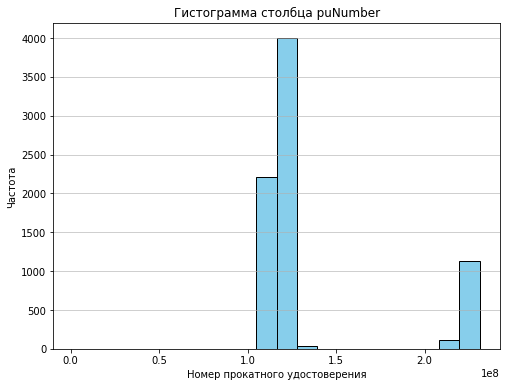

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(data['puNumber'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Номер прокатного удостоверения')
plt.ylabel('Частота')
plt.title('Гистограмма столбца puNumber')
plt.grid(axis='y', alpha=0.75)
plt.show()

Посмотрим распределение значений в столбце 'refundable_support'

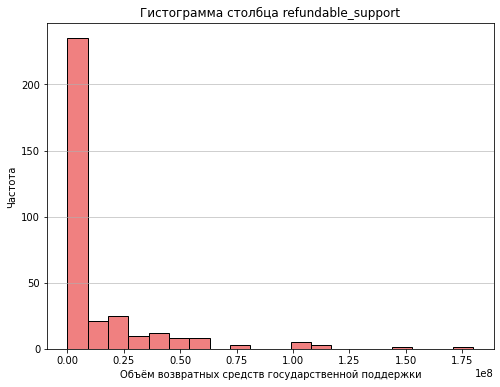

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(data['refundable_support'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Объём возвратных средств государственной поддержки')
plt.ylabel('Частота')
plt.title('Гистограмма столбца refundable_support')
plt.grid(axis='y', alpha=0.75)
plt.show()

Посмотрим распределение значений в столбце 'nonrefundable_support'

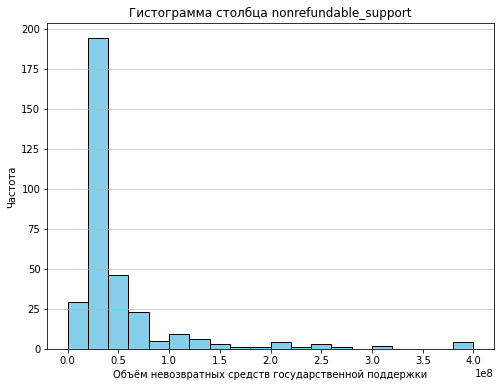

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(data['nonrefundable_support'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Объём невозвратных средств государственной поддержки')
plt.ylabel('Частота')
plt.title('Гистограмма столбца nonrefundable_support')
plt.grid(axis='y', alpha=0.75)
plt.show()

Посмотрим распределение значений в столбце 'budget'

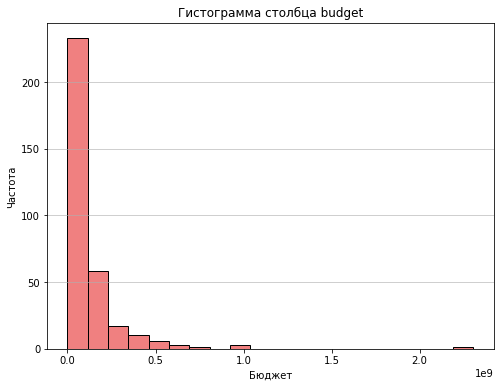

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['budget'], bins=20, color='lightcoral', edgecolor='black')
plt.xlabel('Бюджет')
plt.ylabel('Частота')
plt.title('Гистограмма столбца budget')
plt.grid(axis='y', alpha=0.75)
plt.show()

Посмотрим распределение значений в столбце 'box_office'

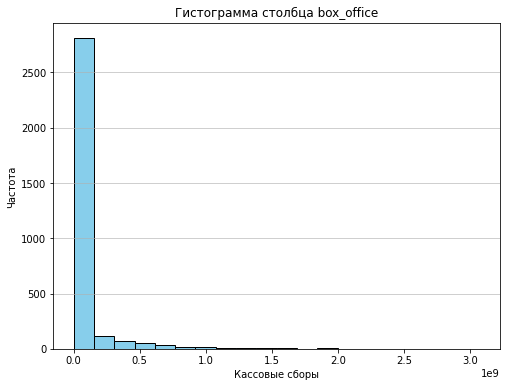

In [16]:
plt.figure(figsize=(8, 6))
plt.hist(data['box_office'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Кассовые сборы')
plt.ylabel('Частота')
plt.title('Гистограмма столбца box_office')
plt.grid(axis='y', alpha=0.75)
plt.show()

Проверим, что все объекты из датасета mkrf_movies вошли в получившийся датафрейм

In [17]:
check_objects = set(mkrf_movies['puNumber']).issubset(set(data['puNumber']))
print("Все объекты из датасета mkrf_movies вошли в получившийся датафрейм data:", check_objects)

Все объекты из датасета mkrf_movies вошли в получившийся датафрейм data: True


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверка типов данных в датафрейме и их преобразование

Посмотрим типы данных в датафрейме и преобразуем их там, где это необходимо.


In [18]:
display(data.dtypes)

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

 Столбец age_restriction не требует изменений

In [19]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

В столбце ratings есть значения, которые не соответствуют шкале оценок сайта КиноПоиск, где оценки обычно варьируются от 0 до 10 с округлением до одного знака после запятой. Некоторые значения могут быть в процентах или за пределами допустимого диапазона. Приведем все значения к одному стандарту измерения. Для удобства обработки данных приведем столбец к типу float

In [20]:
data['ratings'] = data['ratings'].astype(str)
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype(float)
data = data.assign(ratings=data['ratings'].apply(lambda x: x * 10 if x < 1 else x).round(1))
data = data.assign(ratings=data['ratings'].apply(lambda x: x / 10 if x >= 10 else x).round(1))
display(data[(data['ratings'] >= 10)])
display(data['ratings'].unique())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

Преобразуем столбец 'show_start_date' в формат даты/времени (DatetimeIndex) с помощью библиотеки pandas.Для удобства обработки.


In [21]:
data['show_start_date'] = pd.DatetimeIndex(data['show_start_date'])
display(data['show_start_date'].head())

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

Посмотрим на количество и процент пропусков в таблице

С целью контроля размера таблицы, создадим копию исходных данных и посчитаем количество строк в ней.

In [22]:
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [23]:
missing_values = data.isnull().sum()
missing_percentages = (data.isnull().mean() * 100).round(2)
missing_info = pd.concat([missing_values, missing_percentages], axis=1)
missing_info.columns = ['Количество пропусков', 'Процент пропусков']
missing_info.style.background_gradient('coolwarm')

,Количество пропусков,Процент пропусков
title,0,0.000000
puNumber,0,0.000000
show_start_date,0,0.000000
type,0,0.000000
film_studio,18,0.240000
production_country,2,0.030000
director,9,0.120000
producer,568,7.590000
age_restriction,0,0.000000
refundable_support,7154,95.570000


В столбе `film_studio` мы заменим пропущенные данные на "Студия не указана" или названия студий из открытых источников

In [24]:
data.loc[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.loc[1293, 'film_studio'] = 'Biscuit Pictures, Contemptible Entertainment, Mission Filmworks'
data.loc[4441, 'film_studio'] = 'Concept Space / Prostranstvo Idey'
data.loc[6105, 'film_studio'] = 'Pravda Films'
data.loc[6181, 'film_studio'] = 'Cinemaus Studio'
data.loc[6379, 'film_studio'] = 'Студия не указана'
data.loc[6380, 'film_studio'] = 'Студия не указана'
data.loc[6399, 'film_studio'] = 'Студия не указана'
data.loc[6485, 'film_studio'] = 'Студия не указана'
data.loc[6494, 'film_studio'] = 'Anniko Films'
data.loc[6497, 'film_studio'] = 'Студия не указана'
data.loc[6498, 'film_studio'] = 'Студия не указана'
data.loc[6499, 'film_studio'] = 'Студия не указана'
data.loc[6507, 'film_studio'] = 'Студия не указана'
data.loc[6511, 'film_studio'] = 'Студия не указана'
data.loc[6638, 'film_studio'] = 'Студия не указана'
data.loc[6639, 'film_studio'] = 'Студия не указана'
data.loc[6662, 'film_studio'] = 'Студия не указана'
data.loc[6722, 'film_studio'] = 'Студия не указана'
data.loc[data['film_studio'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Аналогично поступим с пропусками в столбах production_country,director,producer,genres

In [26]:
data.loc[3186, 'production_country'] = 'Россия'
data.loc[4441, 'production_country'] = 'Россия'
display(data.loc[data['production_country'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [27]:
data['director'].fillna('Режиссёр не указан', inplace=True)
display(data.loc[data['director'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [28]:
data['producer'].fillna('Продюсер не указан', inplace=True)
display(data.loc[data['producer'].isna()])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [29]:
unique_genres = data['genres'].unique()
display(unique_genres)
data['genres'].fillna('жанр не указан', inplace=True)

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

#### Шаг 2.2. Проверка таблицы на наличие пропусков.

In [30]:
missing_values = data.isnull().sum()
missing_percentages = (data.isnull().mean() * 100).round(2)
missing_info = pd.concat([missing_values, missing_percentages], axis=1)
missing_info.columns = ['Количество пропусков', 'Процент пропусков']
missing_info.style.background_gradient('coolwarm')

,Количество пропусков,Процент пропусков
title,0,0.000000
puNumber,0,0.000000
show_start_date,0,0.000000
type,0,0.000000
film_studio,0,0.000000
production_country,0,0.000000
director,0,0.000000
producer,0,0.000000
age_restriction,0,0.000000
refundable_support,7154,95.570000


Мы заполнили пропуски в некоторых столбцах данных с помощью информации из интернета или отметили, что информация отсутствует. Однако есть столбцы, с большим количеством пропусков, где замена пропусков должна быть осуществлена вручную, только проверенными данными,для исключения искажения результатов мы оставим эти столбы без обработки.

Проверяем, есть ли в данных дубликаты

#### Шаг 2.3. Проверка таблицы на наличие полных дублирующихся строк.

In [31]:
print('Количество дублирующихся строк:', data.duplicated().sum())

Количество дублирующихся строк: 0


In [32]:
duplicates_info = data.apply(lambda x: x.duplicated().any())
display(duplicates_info)
duplicates_title = data[data['title'].duplicated(keep=False)]
display(duplicates_title)
duplicates_puNumber = data[data['puNumber'].duplicated(keep=False)]
display(duplicates_puNumber)

title                    True
puNumber                 True
show_start_date          True
type                     True
film_studio              True
production_country       True
director                 True
producer                 True
age_restriction          True
refundable_support       True
nonrefundable_support    True
budget                   True
financing_source         True
ratings                  True
genres                   True
box_office               True
dtype: bool

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,жанр не указан,0.00
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02 12:00:00+00:00,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,жанр не указан,0.00
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Повторение названий фильмов и прокатного номера может происходить, когда они выходят в прокат в разное время и через разных дистрибьюторов или под разными лицензиями, так же может быть это разные версии фильма, с разными эпизодами, концовками, дополнительными материалами,  но это не влияет на общий смысл, поэтому я оставлю номер без изменений.

#### Шаг 2.4. Изучение категориальных значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [33]:
#print(data['type'].value_counts())
data['type']=data['type'].str.strip()
data['type'].unique()
print(data['type'].value_counts())

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64


Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах.

In [34]:
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(data[column].value_counts())

День святого Валентина_                                    5
Знакомство с Факерами 2.                                   4
Белая мгла /По комиксу Грега Рукка и Стива Либера/         4
Белоснежка и охотник                                       4
Шерлок Холмс                                               4
                                                          ..
П.И.Чайковский. Спящая красавица. Хореография Матса Эка    1
Семья Ивановых                                             1
Дом напротив (2016)                                        1
Неизвестные страницы из жизни разведчика                   1
Месть Пушистых                                             1
Name: title, Length: 6772, dtype: int64
Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64
Киностудия "Мосфильм"                                 

Категориальные столбцы нуждаются в предобработке данных ,
так как они могут содержать пробелы в начале или конце строк,
неправильные регистры и другие аномалии, которые затрудняют обработку данных. 
Например, столбец "production_country" содержит слишком много различных значений, что усложняет анализ данных.

In [35]:
data['production_country'] = data['production_country'].str.strip().str.lower()

In [36]:
data['film_studio'] = data['film_studio'].str.strip().str.lower()

Мы избавились от пробелов в начале и конце строки, а также привили данные в этих столбах  к нижнему регистру для унификации данных

#### Шаг 2.5. Проверка количественныех значений

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Для анализа количественных данных посмотрим сводную статистику.

In [37]:
display(data.describe())

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,519.00","3,159.00"
mean,"135,193,356.60","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,454,486.38"
std,"38,351,376.11","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,318,917.44"
min,"1,811,096.00",0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"85,671.50"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,325,871.10"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,976,224.35"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [38]:
missed_budget = data[(data['refundable_support'] + data['nonrefundable_support']) >  data['budget']]
print(f'Данные о фильмах с аномальными значениями бюджета',missed_budget)
display(len(missed_budget))

Данные о фильмах с аномальными значениями бюджета                        title   puNumber           show_start_date  \
2053                     14+  111023614 2014-12-19 12:00:00+00:00   
2058               Дуxless 2  111000415 2015-01-26 12:00:00+00:00   
2472             Воин (2015)  111017315 2015-09-28 12:00:00+00:00   
2532                 Бармен.  111009615 2015-05-26 12:00:00+00:00   
2615     Савва. Сердце воина  114001715 2015-07-21 12:00:00+00:00   
2684          Тряпичный союз  111010215 2015-06-08 12:00:00+00:00   
2788      Срочно выйду замуж  111017115 2015-09-30 12:00:00+00:00   
2874       Помню - не помню!  111004916 2016-03-01 12:00:00+00:00   
3047  Любовь с ограничениями  111008216 2016-04-29 12:00:00+00:00   
3565       Притяжение (2016)  111018116 2016-12-16 12:00:00+00:00   
3675                Чудо-юдо  114001817 2017-06-27 12:00:00+00:00   
3739                    Мифы  111004317 2017-06-07 12:00:00+00:00   
5673                   Селфи  111012117 2018-02-01 12

17

После анализа данных обнаружено, что есть ряд фильмов, которые получали господдержку, но в бюджете у них равен 0, видимо информацию не внесли в таблицу.Для исправления данных о бюджете я предлагаю скорректировать значения бюджета. 

Определим медианную господдержки для фильмов.

In [39]:
data['support_percentage'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
support_percentage = data['support_percentage'].median()
print(f'Медианная доля господдержки для фильмов',support_percentage)

Медианная доля господдержки для фильмов 0.6140376284219444


In [40]:
data.loc[missed_budget.index, 'budget'] = (data.loc[missed_budget.index, 'refundable_support'] + data.loc[missed_budget.index, 'nonrefundable_support']) / support_percentage

Мы заменили пропуски в столбце бюджета значениями, которые получены путем умножения суммы возвратной и невозвратной поддержки на медианное значение.

Проверим выполнена полная замена или нет?

In [41]:
missed_budget = data[(data['refundable_support'] + data['nonrefundable_support']) >  data['budget']]
display(f'Данные о фильмах с аномальными значениями бюджета',missed_budget)
display(len(missed_budget))

'Данные о фильмах с аномальными значениями бюджета'

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage


0

Выведем информацию о том, какую долю от общего бюджета фильма составляет государственная поддержка.

count   332.00
mean      0.52
std       0.17
min       0.04
25%       0.39
50%       0.61
75%       0.65
max       0.79
Name: budget_ratio, dtype: float64

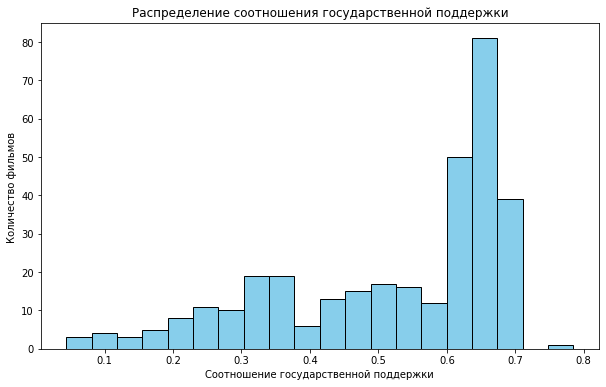

In [42]:
data['budget_ratio'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']).map('{:,.3f}'.format).astype(float)
display(data['budget_ratio'].describe())
plt.figure(figsize=(10, 6))
plt.hist(data[data['budget_ratio'] != 0]['budget_ratio'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Соотношение государственной поддержки')
plt.ylabel('Количество фильмов ')
plt.title('Распределение соотношения государственной поддержки')
plt.show()

In [43]:
count_greater_equal_06 = data[data['budget_ratio'] >= 0.6]['budget_ratio'].count()
count_less_06 = data[data['budget_ratio'] < 0.6]['budget_ratio'].count()
display("Количество значений budget_ratio >= 0.6:", count_greater_equal_06)
display("Количество значений budget_ratio < 0.6:", count_less_06)

'Количество значений budget_ratio >= 0.6:'

171

'Количество значений budget_ratio < 0.6:'

161

###### Для вычисления доли государственной поддержки от общего бюджета подходят только 332 фильма. После проведенного анализа из этой малочисленной выборки мы узнали, что максимальный процент государственной поддержки достигает 65%, в то время как медианный показатель составляет 61.4%. Так же более половины всех изученных фильмов получили от государства поддержку от 60% до 65% их общего бюджета.

Для удобства обработки данных, было принято решение заменить значения в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'box_office', а затем выполнить конвертацию этих значений в миллионы.
Такой подход позволит упростить анализ данных и сделать числа более читаемыми.

In [44]:
data['refundable_support'] = data['refundable_support'] / 1000000
data['nonrefundable_support'] = data['nonrefundable_support'] / 1000000
data['budget'] = data['budget'] / 1000000
data['box_office'] = data['box_office'] / 1000000

Проведен анализ количественных данных и обнаружено, что некоторые фильмы не имели указанного бюджета. Для решения этой проблемы была выполнена замена пропусков в столбце бюджета значениями, полученными путем умножения суммы возвратной и невозвратной поддержки на медианное значение. Также значения в столбцах 'refundable_support', 'nonrefundable_support', 'budget' и 'box_office' были преобразованы в миллионы для удобства анализа.

#### Шаг 2.6. Добавление новых столбцов

Создаем столбец с информацией о годе проката, выполним проверку

In [45]:
data['release_year'] = data['show_start_date'].dt.year

In [46]:
display(data[['show_start_date', 'release_year']].head())

,show_start_date,release_year
0,2015-11-27 12:00:00+00:00,2015
1,2016-09-13 12:00:00+00:00,2016
2,2016-10-10 12:00:00+00:00,2016
3,2016-06-10 12:00:00+00:00,2016
4,2015-07-29 12:00:00+00:00,2015


Создаем три столбца: с именем и фамилией главного режиссёра, продюсера и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров, продюсеров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [47]:
data['main_director'] = data['director'].str.split(",").str[0].str.strip()
data['main_producer'] = data['producer'].str.split(",").str[0].str.strip()
data['main_genre'] = data['genres'].str.split(",").str[0].str.strip()
data['production_country'] = data['production_country'].str.replace(", ", "-")
data['main_production_country'] = data['production_country'].str.split("-", expand=True)[0].str.strip()
unique_production_countries = data['main_production_country'].unique()
display(unique_production_countries)

array(['сша', 'ссср', 'франция', 'германия', 'великобритания',
       'чехословакия', 'новая зеландия', 'канада', 'россия', 'гонконг',
       'ирландия', 'чехия', 'люксембург', 'япония', 'аргентина', 'дания',
       'австрия', 'италия', 'кнр', 'швеция', 'испания', 'мексика',
       'бразилия', 'чили', 'австралия', 'португалия', 'исландия',
       'южная корея', 'бельгия', 'украина', 'босния и герцеговина',
       'норвегия', 'швейцария', 'греция', 'норвения', 'грузия',
       'финляндия', 'израиль', 'иран', 'нидерланды',
       'республика узбекистан', 'турция', 'сербия', 'киргизия', 'индия',
       'польша', 'армения', 'юар', 'республика беларусь', 'румыния',
       'болгария', 'индонезия', 'таиланд', 'малайзия', 'азербайджан',
       'парагвай', 'уругвай', 'сща', 'хорватия', 'венгрия', 'эстония',
       'венесуэла', 'македония', 'республика кипр', 'перу', 'китай',
       'княжество андорра', 'республика казахстан', 'оаэ', 'корея',
       'голландия', 'литва', 'латвия', 'казахстан', '

После всех изменений проверить не изменилось ли количество  строк.

In [48]:
len_data = len(data)
len_temp = len(temp)

if len_data == len_temp:
    print("Длины таблиц data и temp равны.")
else:
    print("Длины таблиц data и temp различаются.")   

Длины таблиц data и temp равны.


Общий вывод по разделу:
С целью предобработки данных для облегчения их дальнейшего анализа были выполнены следующие действия:
устранение проблемных значений в столбцах с категориальными значениями,
удаление лишних пробелов и приведение значений к нижнему регистру;
значения рейтинга были приведены к стандарту оценок сайта КиноПоиск;
исправление пропущенных данных о бюджете; 
преобразование значений в миллионы для удобства анализа; добавление новых столбцов с информацией о годе проката, режиссере, продюсере и жанре фильма.
Теперь данные готовы для дальнейшего анализа.

### Шаг 3. Проведение исследовательского анализа данных о кинопрокате 


#### Шаг 3.1. Количество фильмов, выходивших в прокат каждый год 

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

,Общее количество фильмов,Количество фильмов с информацией о прокате,% фильмов с информацией о прокате
2010,985,105,10.66
2011,622,109,17.52
2012,593,128,21.59
2013,630,184,29.21
2014,807,280,34.70
2015,705,465,65.96
2016,818,526,64.30
2017,505,357,70.69
2018,891,475,53.31
2019,930,530,56.99


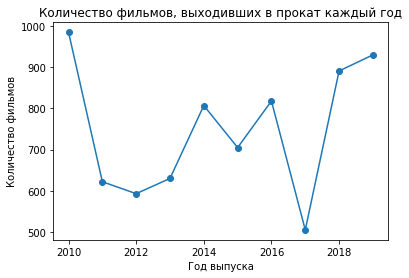

In [49]:
movies_per_year = data['release_year'].value_counts().sort_index()
movie_box = data.groupby('release_year')['box_office'].count()

merged_table = pd.merge(movies_per_year, movie_box, left_index=True, right_index=True, how='inner')
merged_table['ratio'] = merged_table['box_office'] / merged_table['release_year']
merged_table['ratio'] = (merged_table['ratio'] * 100).round(2)

merged_table = merged_table.rename(columns={'release_year': 'Общее количество фильмов ', 'box_office': 'Количество фильмов с информацией о прокате', 'ratio': '% фильмов с информацией о прокате'})
display(merged_table)
plt.plot(movies_per_year.index, movies_per_year.values, marker='o', linestyle='-')
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов, выходивших в прокат каждый год')
plt.show()

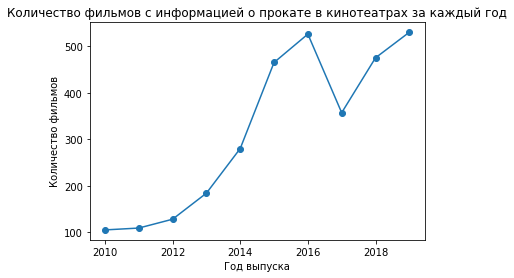

In [50]:
plt.plot(movie_box.index, movie_box.values, marker='o', linestyle='-')
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов с информацией о прокате в кинотеатрах за каждый год')
plt.show()

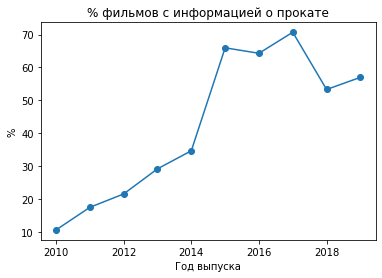

In [51]:
plt.plot(merged_table.index, merged_table['% фильмов с информацией о прокате'], marker='o', linestyle='-')
plt.xlabel('Год выпуска')
plt.ylabel('%')
plt.title('% фильмов с информацией о прокате')
plt.show()

Вывод: Из представленных данных видно, что полнее всего информация о прокате представлена для фильмов выпущенных в 2017 году, где 70.69% фильмов имеют информацию о прокате, то есть 357 фильмов с информацией о прокате из 505 фильмов выпущенных за год. Таким образом, период 2017 год является наиболее полно представленным в данных по информации о прокате фильмов.
Так же стоит заметить, что в целом наиболее полная информация доступна для фильмов период с 2015 по 2019 год, в тот период количество фильмов было в диапазоне  357 до 530 в год, так же самый маленький процент фильмов с информацией о прокате был зафиксирован в 2018 году и составил 53.31%, в то время как пиковое значение достигло 70.69% в 2017 году. Это в 6.63 раза выше, чем в 2010 году, когда был зарегистрирован самый низкий показатель — всего 10.66%. В период с 2010 по 2019 год количество выпущенных фильмов варьировалось, достигая минимума в 505 фильмов в 2017 году и максимума в 985 фильмов в 2010 году. Из-за сравнительно меньшего числа фильмов, выпущенных в 2017 году, и одновременно большого объема данных о прокате, этот год выделяется наибольшим процентным соотношением фильмов с доступной информацией о прокате.
Есть явная тенденция на увеличение  фильмов  с указанной информацией о прокате в кинотеатрах, что в свою очередь приводит  к увеличению процента таких фильмов  от общего количества фильмов, это наглядней всего показывает график. 

#### Шаг 3.2. Годовая сумма кассовых сборов фильмов
- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

release_year
2010        2.43
2011       14.10
2012        6.96
2013       29.80
2014    7,444.95
2015   39,497.37
2016   47,866.30
2017   48,563.71
2018   49,668.40
2019   48,425.71
Name: box_office, dtype: float64

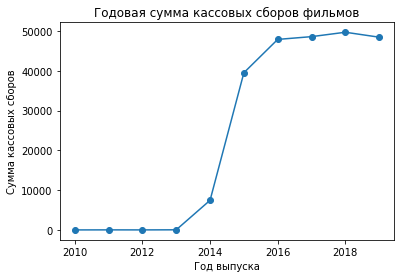

count       10.00
mean    24,151.97
std     24,138.28
min          2.43
25%         18.03
50%     23,471.16
75%     48,285.86
max     49,668.40
Name: box_office, dtype: float64

'Год с минимальной суммой сборов: 2010'

'Год с максимальной суммой сборов: 2018'

In [52]:
total_revenue_per_year = data.groupby('release_year')['box_office'].sum()
display(total_revenue_per_year)
min_revenue_year = total_revenue_per_year.idxmin()
max_revenue_year = total_revenue_per_year.idxmax()
plt.plot(total_revenue_per_year.index, total_revenue_per_year.values, marker='o', linestyle='-')
plt.title('Годовая сумма кассовых сборов фильмов')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма кассовых сборов')
plt.show()
display(total_revenue_per_year.describe())
display(f"Год с минимальной суммой сборов: {min_revenue_year}")
display(f"Год с максимальной суммой сборов: {max_revenue_year}")

Год с наименьшим объемом кассовых сборов: 2010, когда они составили всего 2 миллиона рублей.
Год с наибольшим объемом кассовых сборов: 2018, достигший уровня в 49 668 миллионов рублей.
Заметный всплеск кассовых сборов наблюдается с 2015 по 2019 год, когда сборы значительно возросли. В 2015 году они составили 39 000 миллионов рублей и достигли своего максимума в 2018 году, равного 49 668 миллионам рублей. Данный рост можно объяснить увеличением доли фильмов, данные о прокате которых стали доступны.

#### Шаг 3.3. Средняя и медианная сумма сборов по годам
- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [53]:
pivot_table = pd.pivot_table(data, index='release_year', values='box_office', aggfunc=['mean', 'median'])
display(pivot_table)

,mean,median
,box_office,box_office
release_year,,
2010,0.02,0.00
2011,0.13,0.00
2012,0.05,0.01
2013,0.16,0.00
2014,26.59,0.02
2015,84.94,4.92
2016,91.00,3.85
2017,136.03,9.97


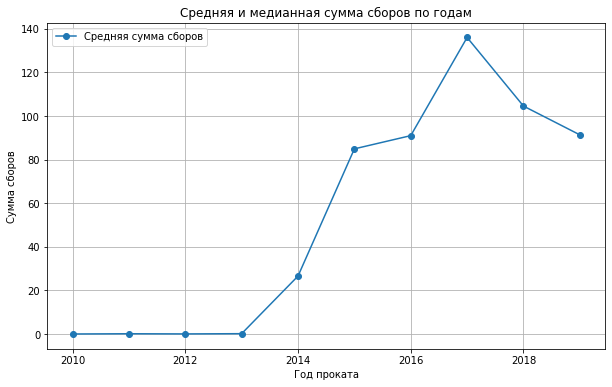

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table[('mean', 'box_office')], marker='o', label='Средняя сумма сборов')
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов')
plt.title('Средняя и медианная сумма сборов по годам')
plt.legend()
plt.grid(True)
plt.show()

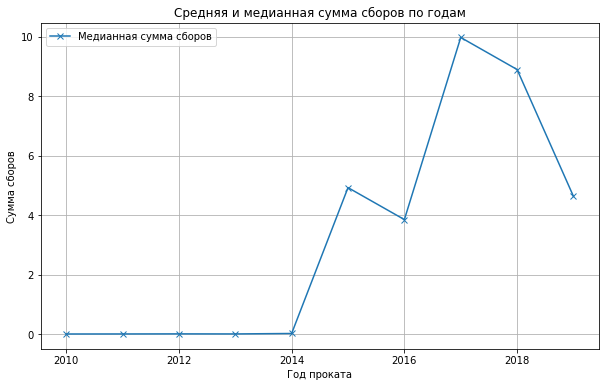

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(pivot_table.index, pivot_table[('median', 'box_office')], marker='x', label='Медианная сумма сборов')
plt.xlabel('Год проката')
plt.ylabel('Сумма сборов')
plt.title('Средняя и медианная сумма сборов по годам')
plt.legend()
plt.grid(True)
plt.show()

Вывод: Начиная с 2015 года и до 2019 года процент фильмов с информацией о прокате значительно увеличился и составил от 54% до 70%. Это означает, что наши данные за этот период намного полнее и дают более точное представление о рынке кинопроката. Увеличение как средних, так и медианных значений кассовых сборов в этот период подтверждается более полными данными, что позволяет делать более обоснованные выводы о росте индустрии и успехе отдельных фильмов.
Из таблицы видно, что средние сборы по годам сильно различаются. Например, в 2017 году средние сборы были 136.03 млн рублей, а в 2010 году - всего 0.02 млн рублей. В 2014, 2015 и 2016 годах средние сборы были значительно выше.
Медианные значения показывают более равномерную картину. Например, в 2017 году медианная сумма сборов составила 9.97 млн рублей, что ближе к значениям других лет. Это может указывать на наличие нескольких крупных блокбастеров в эти годы.
Отличие между средним и медианным значением может быть интересным для анализа успеха фильмов по годам. Большая разница в 2014, 2015 и 2016 годах может указывать на несколько очень успешных фильмов, влияющих на средние сборы. В другие годы разница между этими значениями не так велика, что говорит о равномерном успехе фильмов.

#### Шаг 3.4. Влияние возрастного ограничения  на сборы фильма 
- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [56]:
filtered_data = data[(data['release_year'] >= 2015) & (data['release_year'] <= 2019)]

grouped_data = filtered_data.groupby(['age_restriction', 'release_year'])['box_office'].sum().reset_index()
max_revenue_per_age = grouped_data.groupby('age_restriction')['box_office'].sum().idxmax()
age_value = max_revenue_per_age.split('-')[0]
max_revenue_per_year = grouped_data.loc[grouped_data.groupby('release_year')['box_office'].idxmax()]
display("Фильмы с возрастным ограничением '{}' принесли наибольшие сборы за весь период.".format(age_value))
display("Фильмы с наибольшими сборами по возрастному ограничению для каждого года:")
display(max_revenue_per_year)

"Фильмы с возрастным ограничением '«16+» ' принесли наибольшие сборы за весь период."

'Фильмы с наибольшими сборами по возрастному ограничению для каждого года:'

,age_restriction,release_year,box_office
5,«12+» - для детей старше 12 лет,2015,"13,616.08"
11,«16+» - для детей старше 16 лет,2016,"16,664.55"
12,«16+» - для детей старше 16 лет,2017,"18,745.04"
13,«16+» - для детей старше 16 лет,2018,"16,503.60"
24,«6+» - для детей старше 6 лет,2019,"12,852.55"


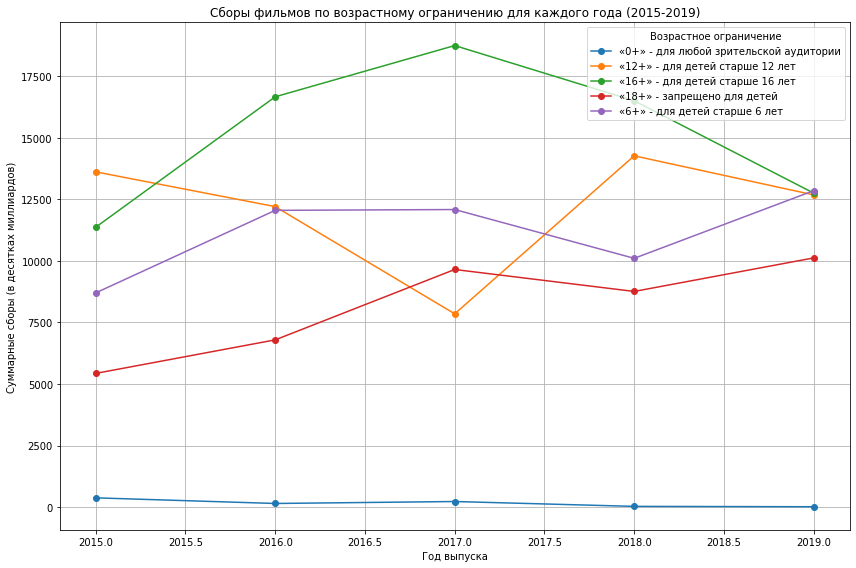

In [57]:
fig, ax = plt.subplots(figsize=(12, 8))
for age, group in grouped_data.groupby('age_restriction'):
    ax.plot(group['release_year'], group['box_office'], marker='o', label=age)

ax.legend(title='Возрастное ограничение')
ax.set_title('Сборы фильмов по возрастному ограничению для каждого года (2015-2019)')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Суммарные сборы (в десятках миллиардов)')

plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 864x576 with 0 Axes>

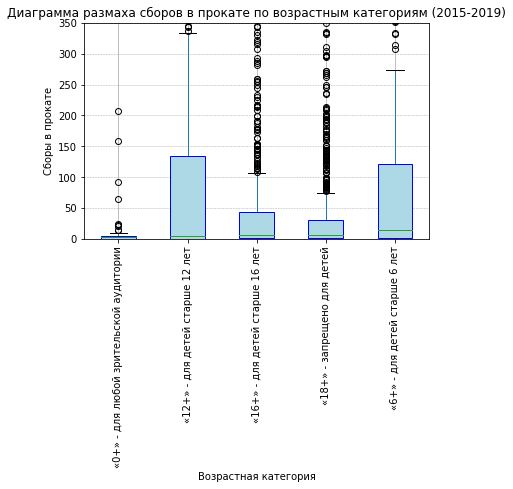

In [58]:
plt.figure(figsize=(12, 8))
boxplot = filtered_data.boxplot(column='box_office', by='age_restriction', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
plt.ylim(0, 350)
plt.title('Диаграмма размаха сборов в прокате по возрастным категориям (2015-2019)')
plt.xlabel('Возрастная категория')
plt.ylabel('Сборы в прокате')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.xticks(rotation=90)
plt.grid(True)
plt.suptitle('')
plt.show()

In [1]:
table_data = filtered_data.groupby('age_restriction')['box_office'].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
table_data.columns = ['Среднее', 'Стандартное отклонение', 'Минимум', '25-й перцентиль', 'Медиана', '75-й перцентиль', 'Максимум']
table_data.reset_index(inplace=True)
print(table_data)

NameError: name 'filtered_data' is not defined

In [60]:
film_count_by_age = filtered_data['age_restriction'].value_counts().reset_index()
film_count_by_age.columns = ['Возрастная категория', 'Количество фильмов']
print(film_count_by_age)

                     Возрастная категория  Количество фильмов
0         «16+» - для детей старше 16 лет                1172
1             «18+» - запрещено для детей                1086
2         «12+» - для детей старше 12 лет                 789
3           «6+» - для детей старше 6 лет                 485
4  «0+» - для любой зрительской аудитории                 317


Вывод: Возрастное ограничение фильма важно для его кинопрокатного успеха. Фильмы категории «16+» часто зарабатывают больше, привлекая широкую аудиторию от подростков до взрослых. Тренды популярности возрастных категорий меняются ежегодно: в 2015 году лидировали фильмы «12+», с 2016 по 2018 - «16+», а в 2019 - «6+», при этом фильмы «16+» всегда оставались в топе и самыми многочисленными. Средние сборы показывают, что категории «12+» и «6+» привлекают больше всего средств - соответственно 174.19 млн и 176.02 млн, в то время как «16+» и «18+» зарабатывают меньше - 94.45 млн и 51.46 млн соответственно. Это подчеркивает необходимость учитывать возрастные предпочтения при планировании релизов для достижения коммерческого успеха.

Проведен анализ данных о кинопрокате.
Общий вывод по разделу: Из анализа данных о прокате фильмов видно, что информация становится более полной с течением времени. С 2010 по 2014 год процент фильмов с информацией о кассовых сборах был невысоким, но с 2015 по 2019 годы этот показатель значительно вырос. Год с наибольшими кассовыми сборами - 2018. Рост сборов связан с увеличением фильмов с доступными данными и показывает высокий интерес зрителей к кинопросмотру. Фильмы "16+" обычно приносят больше денег, так как привлекают широкую аудиторию. Влияние возрастного рейтинга на успех фильмов высоко значимо. Учет внешних факторов и анализ данных о прокате важны для эффективного планирования и распространения кинопроектов.

### Шаг 4. Исследование фильмов, которые получили государственную поддержку.
На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Шаг 4.1 Общее количество средств на поддержку кино по годам

Посмотрите, сколько выделяют средств на поддержку кино.

In [61]:
data_box_office = data.dropna(subset=['box_office']).copy()
len(data_box_office)

3159

Сделаем копию исходной таблицы , за исключением строк, где значение в столбце 'box_office' равно NaN  

      Количество средств на поддержку в год  Количество фильмов  \
2013                                   0.00                   2   
2014                                 142.00                  16   
2015                               1,274.31                  85   
2016                               1,843.00                  60   
2017                               1,438.69                  39   
2018                               1,324.00                  56   
2019                               1,576.00                  60   

      Средняя поддержка на фильм  
2013                        0.00  
2014                        8.88  
2015                       14.99  
2016                       30.72  
2017                       36.89  
2018                       23.64  
2019                       26.27  


/tmp/ipykernel_813/3874283701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_box_office_refundable_support['total_support'] = data_box_office_refundable_support['refundable_support'] + data_box_office['refundable_support']


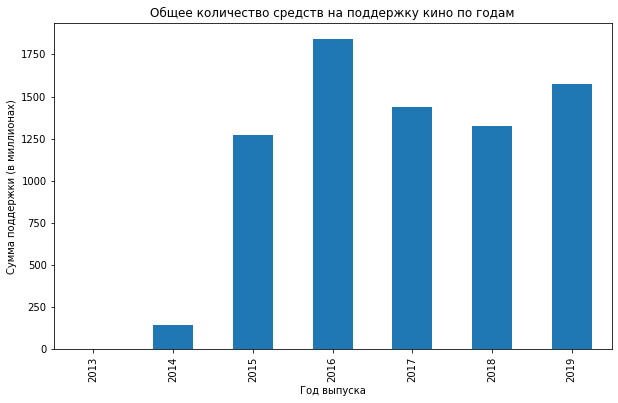

In [62]:
data_box_office_refundable_support = data.dropna(subset=['box_office', 'refundable_support','nonrefundable_support','budget'])
data_box_office_refundable_support['total_support'] = data_box_office_refundable_support['refundable_support'] + data_box_office['refundable_support']
total_support_by_year = data_box_office_refundable_support.groupby('release_year')['total_support'].sum()
films_by_year = data_box_office_refundable_support['release_year'].value_counts()
average_support_per_film = total_support_by_year / films_by_year

result = pd.DataFrame({'Количество средств на поддержку в год': total_support_by_year, 'Количество фильмов': films_by_year, 'Средняя поддержка на фильм': average_support_per_film})
print(result)

total_support_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('Общее количество средств на поддержку кино по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма поддержки (в миллионах)')
plt.show()

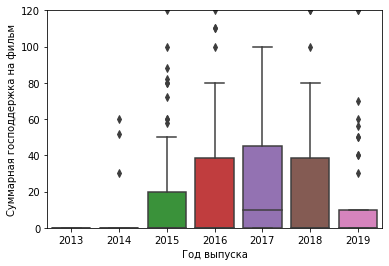

In [63]:
mean_support_by_year = data_box_office_refundable_support.groupby('release_year')['total_support'].mean().reset_index()
sns.boxplot(x='release_year', y='total_support', data=data_box_office_refundable_support)
plt.xlabel('Год выпуска')
plt.ylabel('Суммарная господдержка на фильм')
plt.ylim(0, 120)
plt.show()

В данных которые мы имеем, в 2014 году было выделено минимальное количество средств на поддержку кино, и максимальная сумма выделенная на поддержку кино была в 2016 году 1,8 миллиарда. Полней всего представлен период с 2015 по 2019 год, в этот период общее количество средств в год было в диапазоне от 1,2 до 1,8 миллиарда рублей в год. Средняя поддержка на фильм в 2014 и в 2015 году было ниже всех 8.88 и 15 миллионов рублей, но в диапазоне с 2016 по 2019, она было от 23 до 36 миллионов рублей, что составляет давольно серьезную сумму. 

#### Шаг 4.2 Суммарный доход и суммарная прибыль от фильмов с господдержкой по годам

Суммарные сборы за все годы: 42113.50957478001
Суммарная прибыль за все годы: -739.5709035240725


/tmp/ipykernel_813/2483030201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_box_office_refundable_support['profit'] = data_box_office_refundable_support['box_office'] - data_box_office_refundable_support['budget']


'Суммарный доход и суммарная прибыль от фильмов  с господдержкой по годам:'

              Total Income  Total Profit
release_year                            
2013                 20.32       -235.11
2014              1,017.42       -299.52
2015              5,785.29     -2,181.04
2016              6,081.71     -1,659.44
2017             10,865.08      3,860.07
2018              9,934.07      2,714.06
2019              8,409.63     -2,938.59


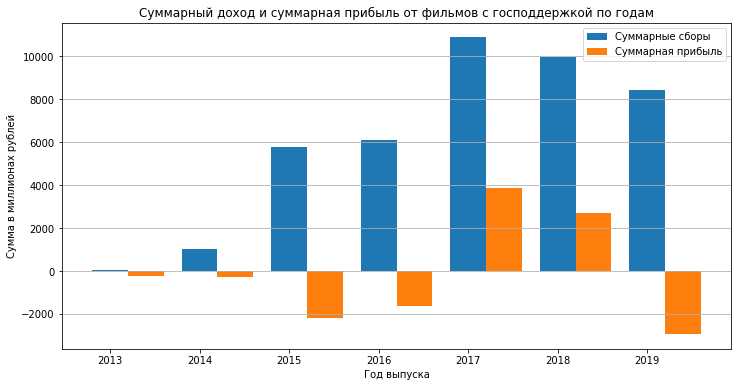

In [64]:
data_box_office_refundable_support['profit'] = data_box_office_refundable_support['box_office'] - data_box_office_refundable_support['budget']
total_income_by_year = data_box_office_refundable_support.groupby('release_year')['box_office'].sum()
total_profit_by_year = data_box_office_refundable_support.groupby('release_year')['profit'].sum()
print("Суммарные сборы за все годы:", total_income_by_year.sum())
print("Суммарная прибыль за все годы:", total_profit_by_year.sum())
display("Суммарный доход и суммарная прибыль от фильмов  с господдержкой по годам:")
df = pd.DataFrame({'Total Income': total_income_by_year, 'Total Profit': total_profit_by_year})
print(df)

plt.figure(figsize=(12, 6))
plt.bar(total_income_by_year.index, total_income_by_year.values, width=0.4, align='center', label='Суммарные сборы')
plt.bar(total_profit_by_year.index + 0.4, total_profit_by_year.values, width=0.4, align='center', label='Суммарная прибыль')
plt.xlabel('Год выпуска')
plt.ylabel('Сумма в миллионах рублей')
plt.title('Суммарный доход и суммарная прибыль от фильмов с господдержкой по годам')
plt.legend()
plt.grid(axis='y')
plt.xticks(total_income_by_year.index)
plt.show()

Диапазон сборов по годам с 2015 по 2019 год от 5,7 до 11 миллиардов в год, суммарная прибыль в освою очередь в диапазоне от -2,7 до + 4 миллиардов в год. Что показывает что не все годы были прибыльными. Самый успешный год 2017,  сборы были на максимуме 11 миллиарда и прибыль была максимальной 4 миллиарда в год. 
Так же можно заметить, что суммарные сборы в период с 2013 по 2019 составили 40 миллиардов рублей, что довольно много. Но суммарный убыток за тот же период составил 1 миллиард рублей. Этот факт можно трактовать по разному, но нужно учитывать, что фильмы могут зарабатывать не только на прокате в кино, но еще на прокате на ТВ и на онлайн платформах или выходе на носителях. 

#### Шаг 4.3 Суммарные сборы, суммарная прибыль и средний процент прибыли от фильмов с господдержкой по жанрам

'Суммарные сборы, суммарная прибыль и средний процент прибыли от фильмов с господдержкой по жанрам:'

,Суммарный доход,Суммарная прибыль,Средний процент прибыли
main_genre,,,
биография,516.883038,-12.050599,-2.331398
боевик,595.928935,-137.793049,-23.122396
военный,1017.670472,-268.236353,-26.357879
детектив,138.547511,-1059.674786,-764.845774
детский,3.013652,-136.284352,-4522.232560
драма,9490.844101,-1386.150790,-14.605137
история,1455.468235,-689.593971,-47.379527
комедия,12479.977454,6331.825374,50.735872
криминал,239.793863,-186.800918,-77.900625


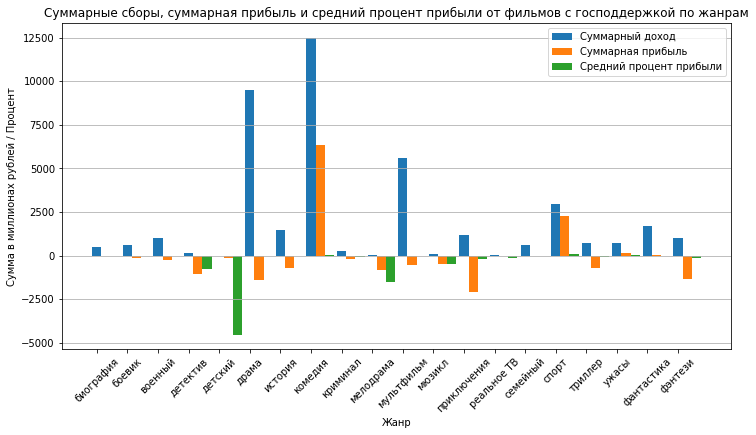

In [65]:
data_box_office_refundable_support = data_box_office_refundable_support[data_box_office_refundable_support['main_genre'] != 'жанр не указан']
total_income_by_genre = data_box_office_refundable_support.groupby('main_genre')['box_office'].sum()
total_profit_by_genre = data_box_office_refundable_support.groupby('main_genre')['profit'].sum()
average_profit_percent_by_genre = (total_profit_by_genre / total_income_by_genre) * 100
average_profit_percent_by_genre = average_profit_percent_by_genre.fillna(0)  
result_by_genre = pd.concat([total_income_by_genre, total_profit_by_genre, average_profit_percent_by_genre], axis=1)
result_by_genre.columns = ['Суммарный доход', 'Суммарная прибыль', 'Средний процент прибыли']

display("Суммарные сборы, суммарная прибыль и средний процент прибыли от фильмов с господдержкой по жанрам:")
display(result_by_genre.style.background_gradient('coolwarm'))

plt.figure(figsize=(12, 6))
plt.bar(result_by_genre.index, result_by_genre['Суммарный доход'], width=0.3, align='center', label='Суммарный доход')
plt.bar(np.arange(len(result_by_genre)) + 0.3, result_by_genre['Суммарная прибыль'], width=0.3, align='center', label='Суммарная прибыль')
plt.bar(np.arange(len(result_by_genre)) + 0.6, result_by_genre['Средний процент прибыли'], width=0.3, align='center', label='Средний процент прибыли')
plt.xlabel('Жанр')
plt.ylabel('Сумма в миллионах рублей / Процент')
plt.title('Суммарные сборы, суммарная прибыль и средний процент прибыли от фильмов с господдержкой по жанрам')
plt.legend()
plt.grid(axis='y')
plt.xticks(np.arange(len(result_by_genre)), result_by_genre.index, rotation=45)
plt.show()

Выбор жанра значительно влияет на финансовые результаты кинопроекта с господдержкой. 
Важно учитывать не только потенциальный доход,
но и связанные с производством затраты, чтобы оптимизировать прибыльность. 
Самые прибыльные жанры с расчетом  на один фильм это “Спорт” 77% и “Комедия” 50%, этаже жанры и собрали самую большую прибыль. Cамый убыточный жанр с расчетом на один фильм это “Детский” - 4522%.  Самые высокие суммарные сборы у жанра “Комедия” 12500 миллионов рублей. 


#### Шаг 4.4 Средний рейтинг

In [66]:
data_russia_no_budget = data[(data['main_production_country'] == 'россия') & (data['budget'].isnull())].copy()
data_without_russia = data[data['main_production_country'] != 'россия'].copy()
count_films_without_russia = data_without_russia.groupby('release_year').size()


data_box_office_cleaned = data_box_office.dropna(subset=['budget'])

average_rating_support_by_year = data_box_office_cleaned.groupby('release_year')['ratings'].mean()

average_rating_russia_no_budget = data_russia_no_budget.groupby('release_year')['ratings'].mean()
average_rating_without_russia = data_without_russia.groupby('release_year')['ratings'].mean()
count_films_russia = data_russia_no_budget.groupby('release_year').size()
count_films_by_year = data_box_office.groupby('release_year').size()

summary_table = pd.DataFrame({
    'Количество фильмов не из России': count_films_without_russia,
    'Средний рейтинг фильмов не из России': average_rating_without_russia,
    'Количество фильмов с поддержкой России': count_films_by_year,
    'Средний рейтинг фильмов с поддержкой России': average_rating_support_by_year,
    'Количество фильмов из России без господдержки': count_films_russia,
    'Средний рейтинг фильмов из России без господдержки': average_rating_russia_no_budget,

    
})

display(summary_table)



,Количество фильмов не из России,Средний рейтинг фильмов не из России,Количество фильмов с поддержкой России,Средний рейтинг фильмов с поддержкой России,Количество фильмов из России без господдержки,Средний рейтинг фильмов из России без господдержки
release_year,,,,,,
2010,795,6.86,105,NaN,190,6.06
2011,509,6.65,109,NaN,113,5.96
2012,518,6.61,128,NaN,75,6.09
2013,553,6.61,184,6.70,75,5.85
2014,670,6.60,280,6.01,121,6.06
2015,511,6.43,465,6.14,108,5.85
2016,633,6.45,526,5.65,124,6.21
2017,375,6.40,357,5.99,89,6.00
2018,402,6.39,475,6.00,433,6.49


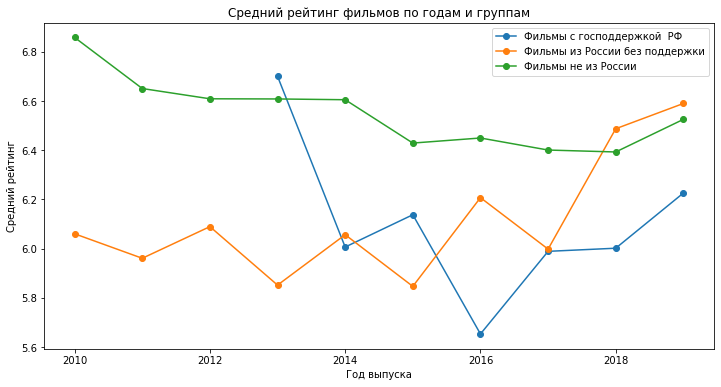

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(average_rating_support_by_year.index, average_rating_support_by_year, marker='o', label='Фильмы с господдержкой  РФ')
plt.plot(average_rating_russia_no_budget.index, average_rating_russia_no_budget, marker='o', label='Фильмы из России без поддержки')
plt.plot(average_rating_without_russia.index, average_rating_without_russia, marker='o', label='Фильмы не из России')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг')
plt.title('Средний рейтинг фильмов по годам и группам')
plt.legend()
plt.show()

В целом, данные показывают, что качество и восприятие российских фильмов, 
как с господдержкой, так и без неё, улучшилось за последние десять лет. 
Это может быть результатом развития кинопроизводства в стране и улучшения стандартов производства и сценарного мастерства.

In [68]:
average_rating_support_by_genre = data_box_office_cleaned.groupby('main_genre')['ratings'].mean()
average_rating_russia_no_budget = data_russia_no_budget.groupby('main_genre')['ratings'].mean()
average_rating_without_russia = data_without_russia.groupby('main_genre')['ratings'].mean()


summary_table_main_genre = pd.DataFrame({
    
      
    'Средний рейтинг фильмов не из России': average_rating_without_russia,
    'Средний рейтинг фильмов с господдержкой России': average_rating_support_by_genre,
    'Средний рейтинг фильмов из России без господдержки': average_rating_russia_no_budget
})

display(summary_table_main_genre)

,Средний рейтинг фильмов не из России,Средний рейтинг фильмов с господдержкой России,Средний рейтинг фильмов из России без господдержки
main_genre,,,
аниме,7.49,NaN,7.38
биография,7.11,6.90,6.81
боевик,6.53,6.58,6.27
вестерн,7.20,NaN,7.90
военный,7.02,6.47,6.41
детектив,6.79,6.76,6.34
детский,6.50,7.10,5.92
для взрослых,4.47,NaN,NaN
документальный,7.28,NaN,7.01


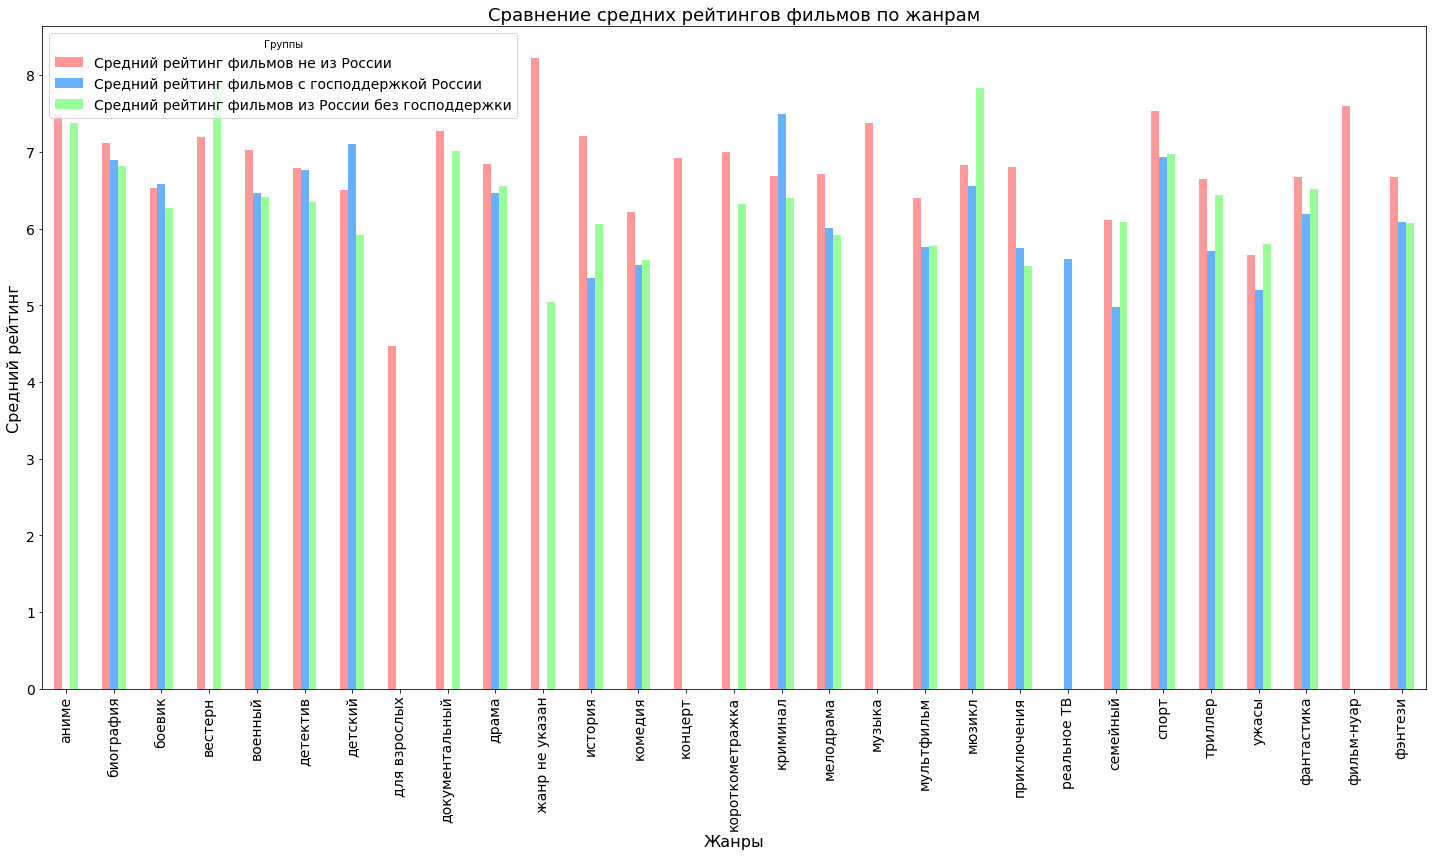

In [69]:
plt.figure(figsize=(20, 12))
colors = ['#FF9999', '#66B2FF', '#99FF99'] 
plot = summary_table_main_genre.plot(kind='bar', ax=plt.gca(), fontsize=14, color=colors)
plt.title('Сравнение средних рейтингов фильмов по жанрам', fontsize=18)
plt.xlabel('Жанры', fontsize=16)
plt.ylabel('Средний рейтинг', fontsize=16)
plt.xticks(rotation=90)
plt.legend(title='Группы', fontsize=14)
plt.tight_layout()
plt.show()


Фильмы с государственной поддержкой в различных жанрах демонстрируют разнообразие в рейтингах,
но в целом они склонны получать более низкие оценки по сравнению с зарубежными проектами и отечественными без поддержки.
Особенно это заметно в жанрах комедии и мультфильма, где разрыв между рейтингами наиболее выражен.

Был проведен анализ фильмов с господдержкой. Общий вывод по разделу: Из проведенного исследования видно, что российские фильмы с государственной поддержкой ценятся у зрителей. Сборы и прибыль варьируются в зависимости от года, с самым успешным годом 2017. Жанр фильма также влияет на финансовые результаты, с "Спортом" и "Комедией" показывающими наилучшие результаты. Российские фильмы стали качественнее за последние десять лет, но фильмы с государственной поддержкой получают более низкие оценки, хотя имеют хороший рейтинг.

### Шаг 5. Общий вывод

В процессе предобработки данных мы объединили данные из двух таблиц в один датафрейм и изучили его общую информацию,
включая количество записей, типы данных и пропущенные значения.
Для наглядного представления распределения числовых значений мы построили гистограммы.
Так же Была проведена обработка данных, включая заполнение пропущенных значений из интернета или пометку об их отсутствии. 
Изменен формат данных в некоторых столбцах для удобства обработки. 
Были выявлены столбцы  с дубликатами. Добавлены столбы с указанием главного режиссера,
продюсера и и страны производства. Данные в финансовом столбах конвертированны в "миллионы рублей".
После всех этих шагов данные готовы к дальнейшему анализу.

Раздел анализ данных о кинопрокате.
Полнота информации о прокате фильмов улучшается с течением времени. С 2010 по 2014 год процент фильмов с информацией о кассовых сборах составлял не более 35%, а с 2015 по 2019 годы этот показатель значительно вырос до 53-70%. Увеличение количества фильмов с доступными данными может быть связано как с ростом производства, так и с улучшением механизмов сбора информации. Год с наибольшими кассовыми сборами - 2018, что может отражать как общий рост интереса к кино, так и успех конкретных блокбастеров. Год с наибольшими кассовыми сборами - 2018, 49 668 млн руб. Всплеск сборов наблюдается с 2015 по 2019 год: от 39 000 млн руб в 2015 до максимума в 2018. Рост связан с увеличением фильмов с информацией о прокате и свидетельствует о высоком интересе зрителей к просмотру фильмов в кинотеатрах. Выявлена разница между средним и медианным значением по годам, и анализ средних и медианных сумм сборов подтверждает рост индустрии кинопроката. Большая разница в 2014-2016 годах может свидетельствовать о нескольких очень успешных фильмах, влияющих на средние сборы. В другие годы эта разница не так велика, что указывает на равномерный успех фильмов. Фильмы "16+" обычно приносят больше денег, потому что привлекают широкую аудиторию от подростков до взрослых и из-за самого большого числа фильмов, выпущенных для этой категории. Влияние возрастного рейтинга на успех фильмов высоко значимо, определяя потенциальную аудиторию и объем сборов. Возрастное ограничение фильма важно для его успеха в кинопрокате. Необходимо учитывать внешние факторы и анализировать данные о прокате для эффективного планирования и распространения кинопроектов.

Раздел анализ фильмов, которые получили государственную поддержку. Из проведенного исследования видно, что российские фильмы с государственной поддержкой ценятся у зрителей. Сборы по годам с 2015 по 2019 варьируются от 5,7 до 11 млрд рублей в год, прибыль - от -2,7 до +4 млрд. Самый успешный год - 2017, с максимальными сборами и прибылью. Суммарные сборы с 2013 по 2019 составили 40 млрд, но убыток за этот период - 1 млрд,что может быть компенсировано другими источниками дохода, такие как продажа прав на показ фильма на стриминговых платформах, продажа DVD и Blu-ray дисков, лицензирование музыки из фильма и т.д.Поддержка кино с 2015 по 2019 колебалась от 1,2 до 1,8 млрд рублей в год. Средняя поддержка на фильм выросла с 2016 до 2019 года. Жанр влияет на финансовые результаты: "Спорт" и "Комедия" - самые прибыльные, "Детский" - убыточный. Российские фильмы стали качественнее за последние десять лет благодаря развитию кинопроизводства и улучшению стандартов. Фильмы с господдержкой получают более низкие оценки по сравнению с зарубежными и отечественными без поддержки, особенно в жанрах комедии и мультфильма, но имеют хороший рейтинг.

Общий вывод:
Увеличение числа фильмов с информацией о прокате с 2015 по 2019 год позволило получить более полные данные о кассовых сборах за этот период, что напрямую влияет на общую сумму сборов за данный временной промежуток. Анализ средней и медианной суммы сборов по годам выявил увеличение интереса зрителей к кино. Также обнаружена разница в 2014-2016 годах, что может указывать на успех нескольких фильмов, повлиявших на средние сборы. Возможно, дальнейший анализ позволит выявить эти фильмы для выявления закономерностей. Возрастное ограничение также оказывает влияние на общие сборы, поскольку фильмы с возрастным ограничением "16+" обычно приносят больше прибыли из-за своей широкой аудитории. Информация о фильмах с государственной поддержкой наиболее полна в период с 2015 по 2019 год. Хотя общий период с 2013 по 2019 год показал убыток по таким фильмам, я считаю, что этот убыток несущественен, поскольку он может быть компенсирован продажей прав на прокат фильмов в онлайн кинотеатры и на носителях. Отдельный анализ по жанрам показал, что комедии и спортивные фильмы окупаются лучше всего. Общий рейтинг также показал, что у зрителей сохраняется интерес к фильмам с государственной поддержкой, несмотря на их получаемые более низкие оценки.

Вывод: Фильмы с государственной поддержкой привлекают внимание зрителей, имеют хороший, но не идеальный рейтинг, и в целом не окупились, однако в будущем могут стать прибыльными и конкурировать за рейтинг с зарубежными фильмами, особенно в жанрах "Комедии" и "Спорт".
Рекомендации: Рекомендуется продолжить исследования для более глубокого изучения факторов, влияющих на рейтинг и кассовые сборы, таких как возможная связь с конкретными киностудиями.

P.S. Олег, могли бы вы подсказать, какие темы или направления в обучении я должен особенно уделить внимание, для дальнейшего развития?